In [139]:
import tracking_kline as tk
import seaborn as sns

In [140]:
#This is used to collect a full series of kline
kline = tk.kuc_collect_multi_kline(coin_pair="BTC-USDT", interval_unit="hour", interval_int=1, rounds=200)
kline = kline.sort_values(by="time", ascending=True)

kline = tk.change_to_datetime(kline)
kline.head(5)


,open,close,high,low,volume,turnover
time,,,,,,
2017-10-04 00:00:00,4307.0,4307.0,4307.0,4307.0,0.001000,4.307000
2017-10-04 05:00:00,4307.0,4307.0,4307.0,4307.0,0.028360,122.144969
2017-10-05 09:00:00,3500.0,3500.0,3500.0,3500.0,0.010368,36.287685
2017-10-05 20:00:00,4860.0,4860.0,4860.0,4860.0,0.015000,72.900000
2017-10-06 22:00:00,3850.0,3850.0,3850.0,3850.0,0.003568,13.736453


<Axes: title={'center': 'Relationship between Change of Close Price and Change in Volume'}, xlabel='Percent Change of Volume', ylabel='Percent Change of Close Price'>

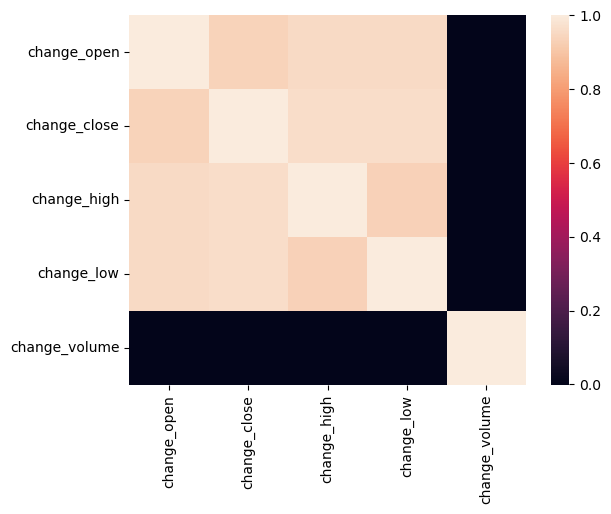

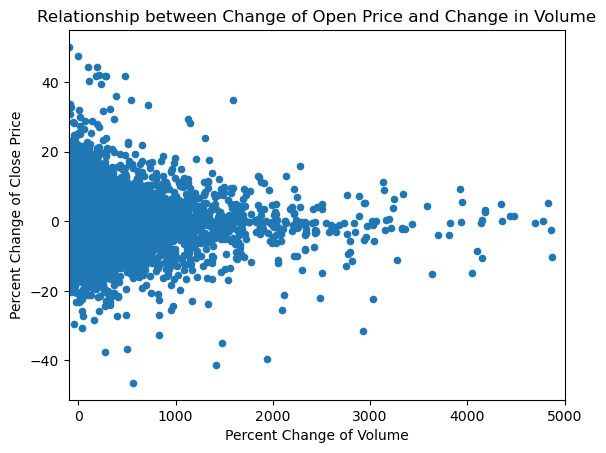

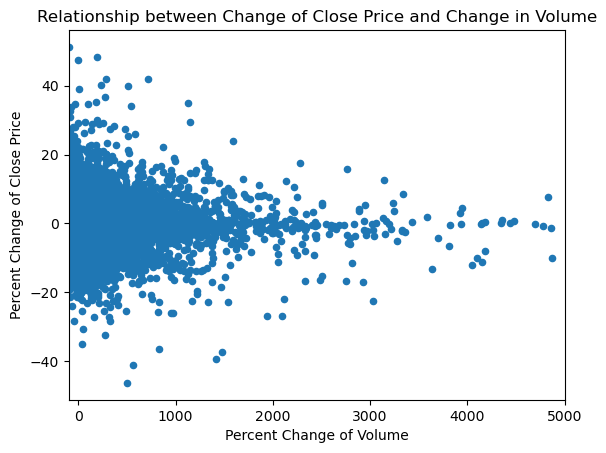

In [141]:
# Calculate changes in the open price, the close price, and the volume using pct_change. 
# 24 is used as the change in period to capture the daily change in price/volume
# So that the percent change is as a percentage, it is multiplied by 100 
kline['change_open'] = kline['open'].pct_change(24) * 100
kline['change_close'] = kline['close'].pct_change(24) * 100
kline['change_high'] = kline['high'].pct_change(24) * 100
kline['change_low'] = kline['low'].pct_change(24) * 100
kline['change_volume'] = kline['volume'].pct_change(24) * 100

percent_changes = kline[['change_open', 'change_close', 'change_volume']]
#narrow it down to the changes in the relevant columns.
corr_kline = kline[['change_open', 'change_close', 'change_high', 'change_low', 'change_volume']]
#The question is if the change in volume corresponds at all to a change in the magnitude of the price changes.
#To display the correlation or lack there of, a heatmap is used
sns.heatmap(corr_kline.corr())
#Plot to show any relationship to close price and change in volume
corr_kline.plot("change_volume", "change_close", kind="scatter", ylabel="Percent Change of Close Price", xlabel="Percent Change of Volume",
                title = "Relationship between Change of Open Price and Change in Volume", xlim=[-100, 5000])
#Plot to show any relationship to open price and change in volume
corr_kline.plot("change_volume", "change_open", kind="scatter", ylabel="Percent Change of Close Price", xlabel="Percent Change of Volume",
                title = "Relationship between Change of Close Price and Change in Volume", xlim=[-100, 5000])

<Axes: xlabel='year', ylabel='Percent Change of Open Price'>

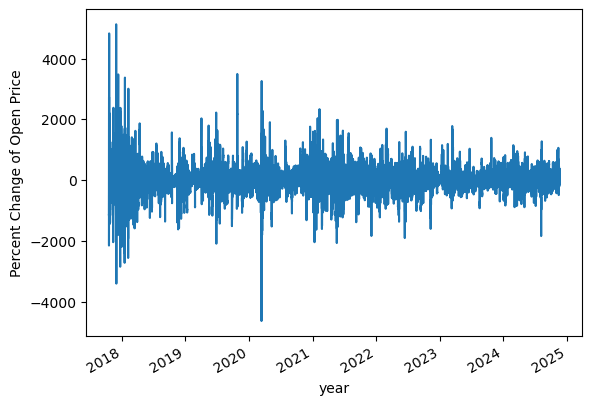

In [142]:
#This is a plot to show the percent changes associated with open price generally
(kline['change_open'] * 100).plot(ylabel="Percent Change of Open Price", xlabel  = "year")


<Axes: xlabel='year', ylabel='Percent Change of Close Price'>

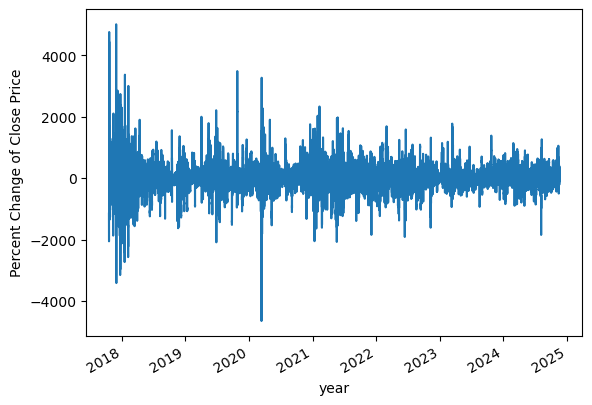

In [143]:
#This is a plot to show the percent changes associated with close price generally
(kline['change_close'] * 100).plot(ylabel="Percent Change of Close Price", xlabel  = "year")

<Axes: xlabel='year', ylabel='Percent Change of Volume'>

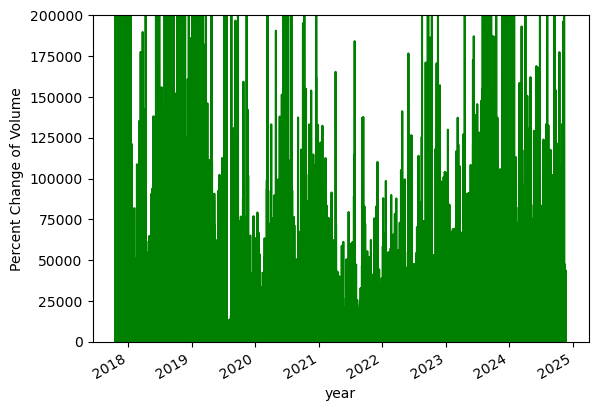

In [144]:
#This is a plot to show the percent changes associated with volume generally
(kline['change_volume'] * 100).plot(ylabel="Percent Change of Volume", xlabel  = "year", ylim=[0, 200000], color = "green")

<Axes: title={'center': 'Percent Change of Close Price vs Month'}, xlabel='Month', ylabel='Percent Change'>

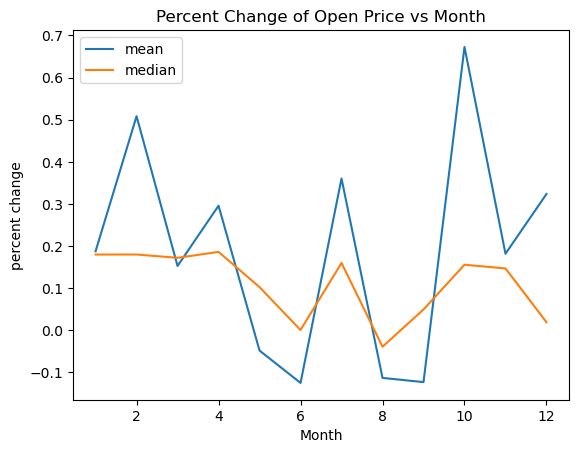

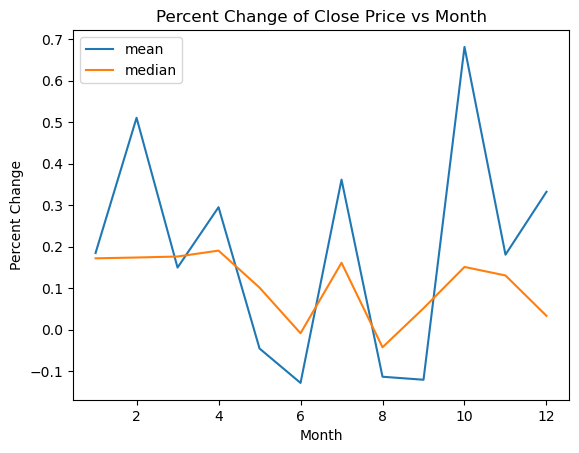

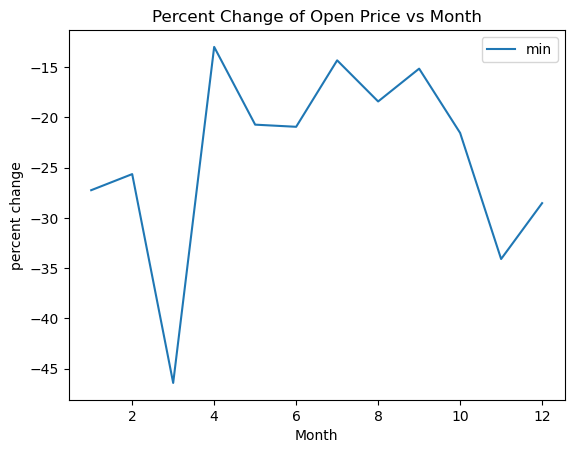

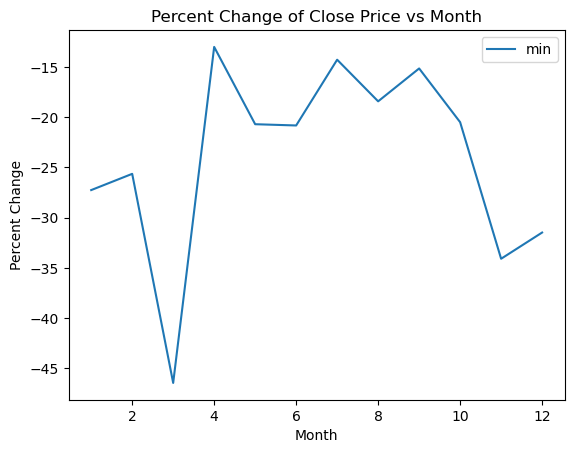

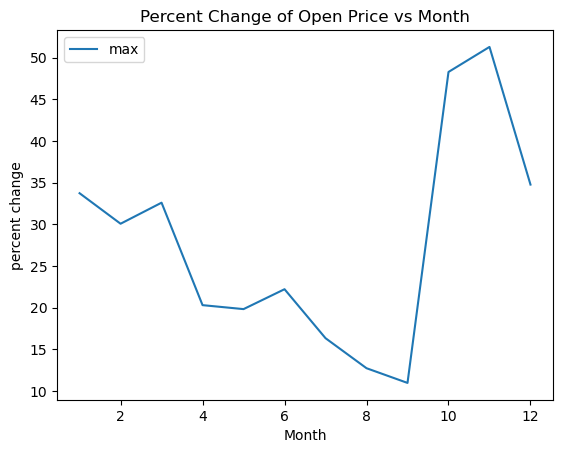

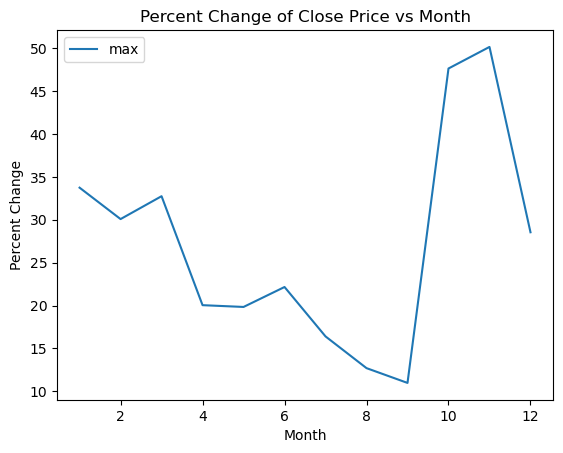

In [145]:
#The percent change of the open prices and close prices are grouped by month and aggregated to generate a mean and median value then plotted
grouped_open = kline['change_open'].groupby(kline.index.month).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Open Price vs Month", xlabel = "Month", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.month).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Close Price vs Month", xlabel = "Month", ylabel="Percent Change")
#The percent change of the open prices and close prices are grouped by month and aggregated to generate a minimum or maximum value then plotted
grouped_open = kline['change_open'].groupby(kline.index.month).agg(["min"])
grouped_open.plot(title = "Percent Change of Open Price vs Month", xlabel = "Month", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.month).agg(["min"])
grouped_open.plot(title = "Percent Change of Close Price vs Month", xlabel = "Month", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby(kline.index.month).agg(["max"])
grouped_open.plot(title = "Percent Change of Open Price vs Month", xlabel = "Month", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.month).agg(["max"])
grouped_open.plot(title = "Percent Change of Close Price vs Month", xlabel = "Month", ylabel="Percent Change")

<Axes: title={'center': 'Close Price vs Month'}, xlabel='Month', ylabel='Dollars'>

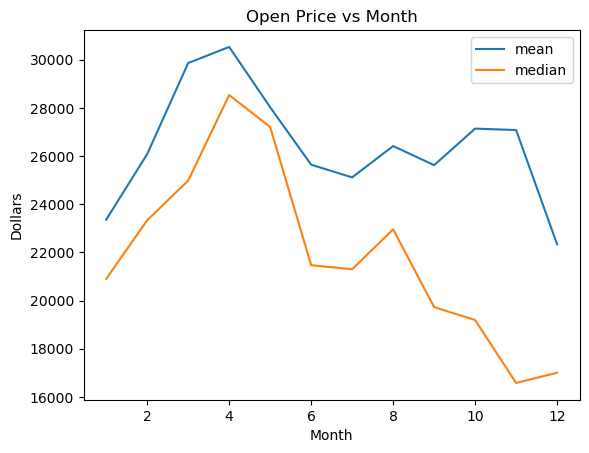

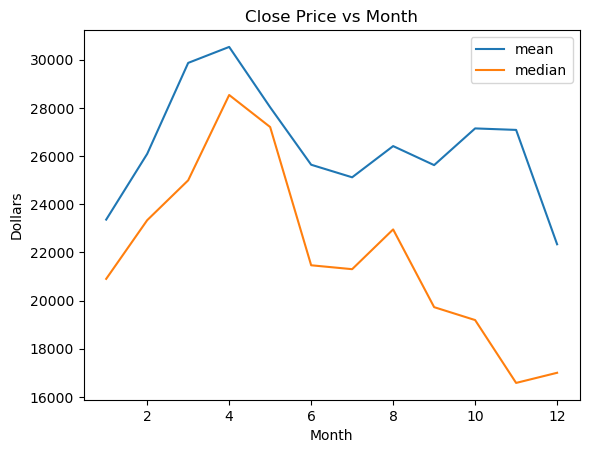

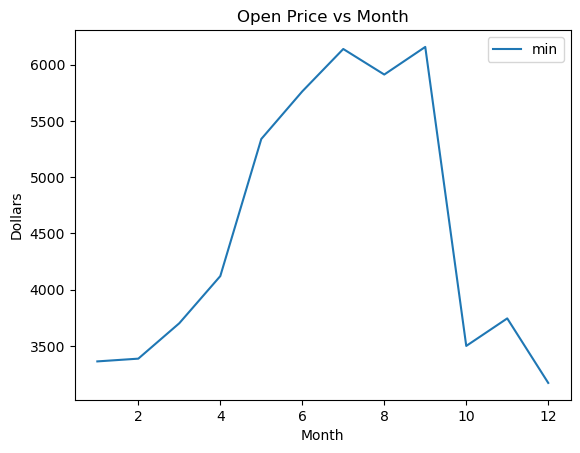

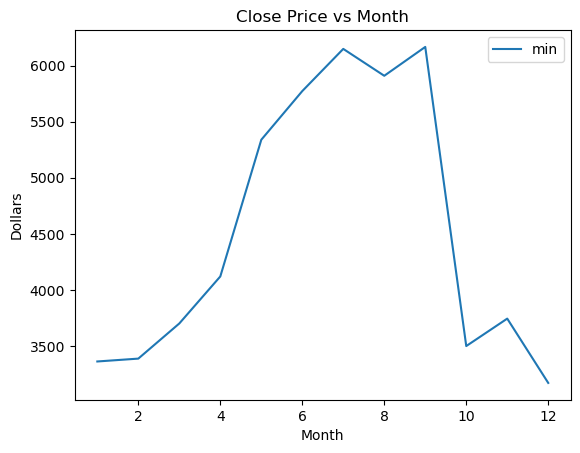

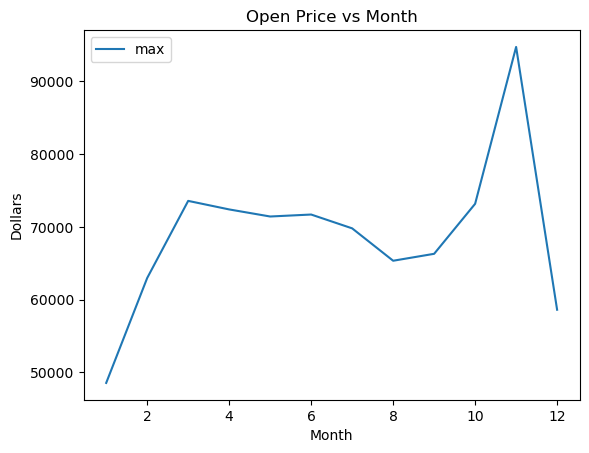

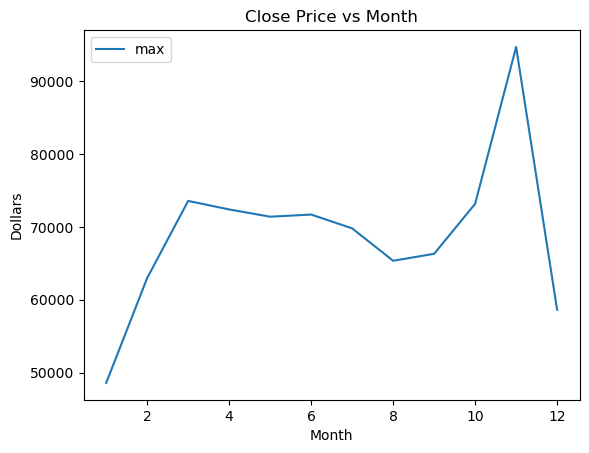

In [146]:
#The open prices and close prices are grouped by month and aggregated to generate a mean and median value then plotted
grouped_open = kline['open'].groupby(kline.index.month).agg(["mean", "median"])
grouped_open.plot(title = "Open Price vs Month", xlabel = "Month", ylabel="Dollars")

grouped_open = kline['close'].groupby(kline.index.month).agg(["mean", "median"])
grouped_open.plot(title = "Close Price vs Month", xlabel = "Month", ylabel="Dollars")
#The open prices and close prices are grouped by month and aggregated to generate a minimum or maximum value then plotted
grouped_open = kline['open'].groupby(kline.index.month).agg(["min"])
grouped_open.plot(title = "Open Price vs Month", xlabel = "Month", ylabel="Dollars")

grouped_open = kline['close'].groupby(kline.index.month).agg(["min"])
grouped_open.plot(title = "Close Price vs Month", xlabel = "Month", ylabel="Dollars")

grouped_open = kline['open'].groupby(kline.index.month).agg(["max"])
grouped_open.plot(title = "Open Price vs Month", xlabel = "Month", ylabel="Dollars")

grouped_open = kline['close'].groupby(kline.index.month).agg(["max"])
grouped_open.plot(title = "Close Price vs Month", xlabel = "Month", ylabel="Dollars")

<Axes: title={'center': 'Percent Change of Close Price vs Day of Week'}, xlabel='Day of Week', ylabel='Percent Change'>

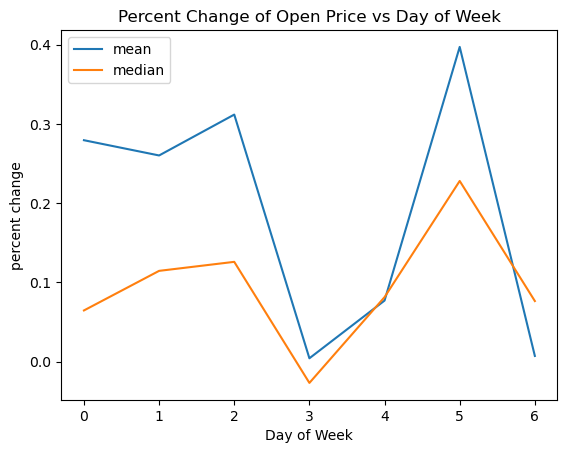

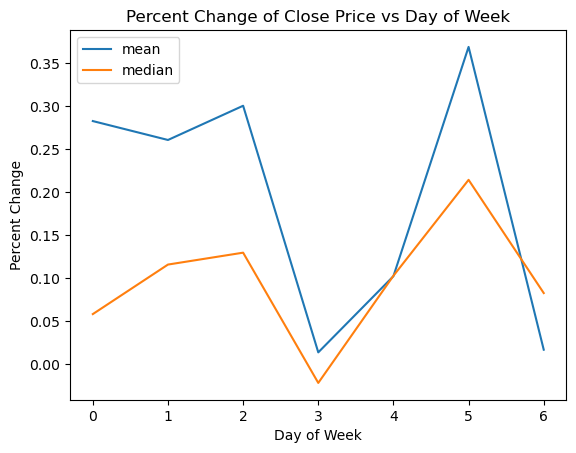

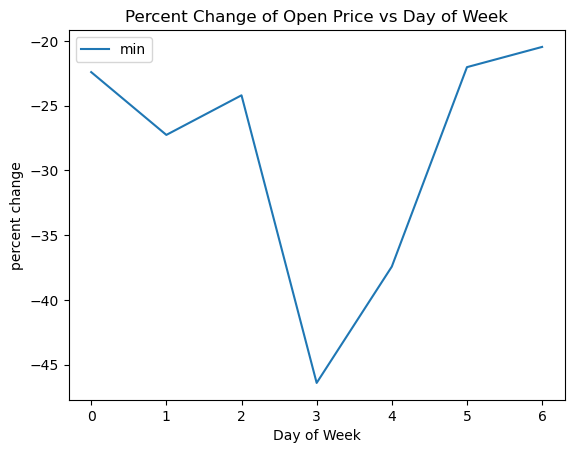

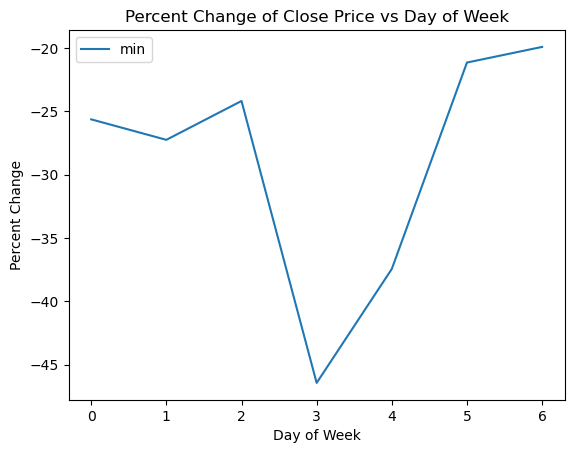

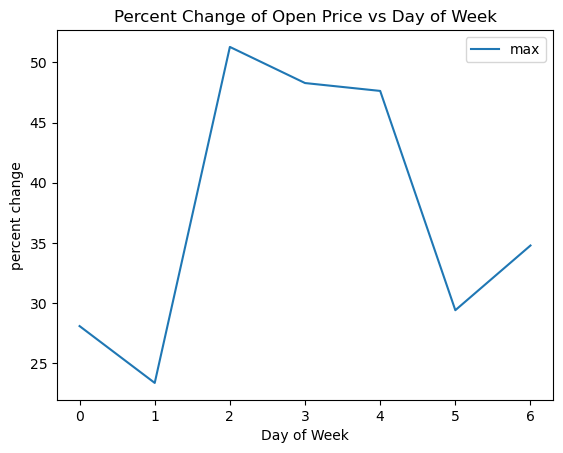

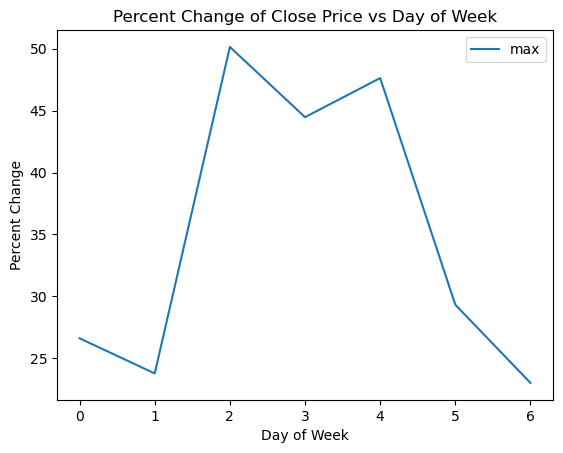

In [147]:
#The percent change of the open prices and close prices are grouped by week day and aggregated to generate a mean and median value then plotted
grouped_open = kline['change_open'].groupby(kline.index.day_of_week).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Open Price vs Day of Week", xlabel = "Day of Week", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.day_of_week).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Close Price vs Day of Week", xlabel = "Day of Week", ylabel="Percent Change")
#The percent change of the open prices and close prices are grouped by week day and aggregated to generate a minimum or maximum value then plotted
grouped_open = kline['change_open'].groupby(kline.index.day_of_week).agg(["min"])
grouped_open.plot(title = "Percent Change of Open Price vs Day of Week", xlabel = "Day of Week", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.day_of_week).agg(["min"])
grouped_open.plot(title = "Percent Change of Close Price vs Day of Week", xlabel = "Day of Week", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby(kline.index.day_of_week).agg(["max"])
grouped_open.plot(title = "Percent Change of Open Price vs Day of Week", xlabel = "Day of Week", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.day_of_week).agg(["max"])
grouped_open.plot(title = "Percent Change of Close Price vs Day of Week", xlabel = "Day of Week", ylabel="Percent Change")

<Axes: title={'center': 'Percent Change of Close Price vs Month and Day of Week'}, xlabel='Month, Day of Week', ylabel='Percent Change'>

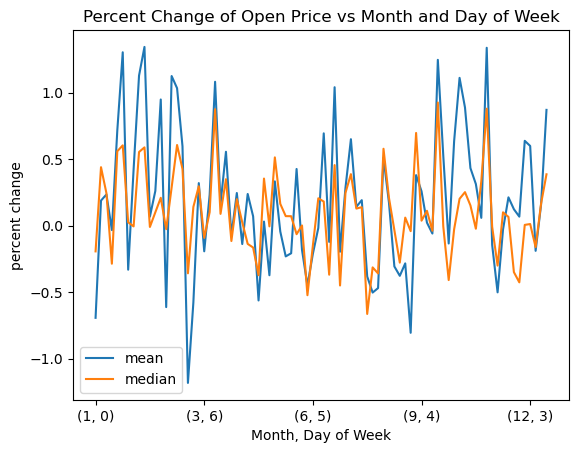

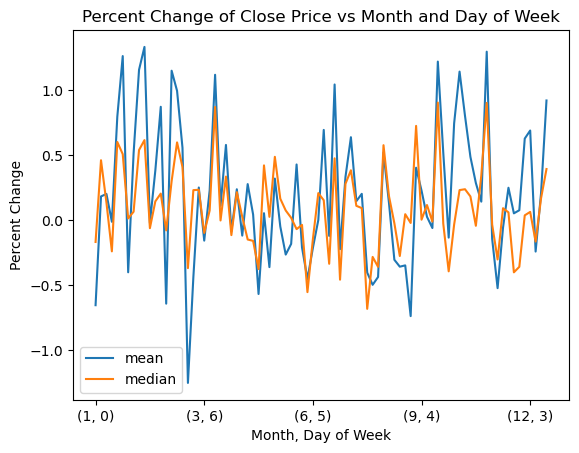

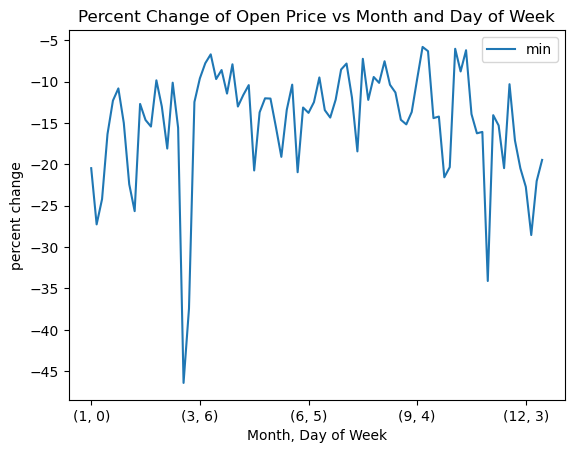

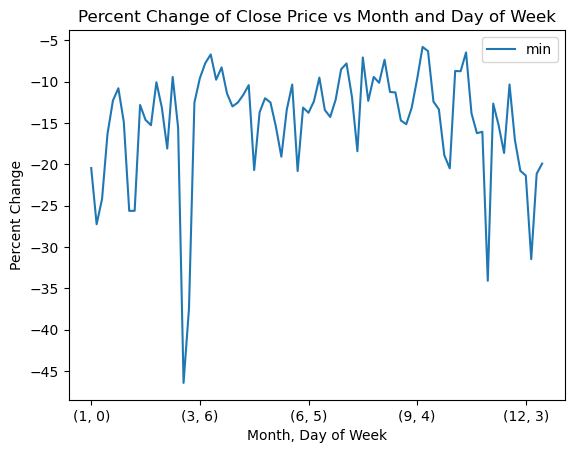

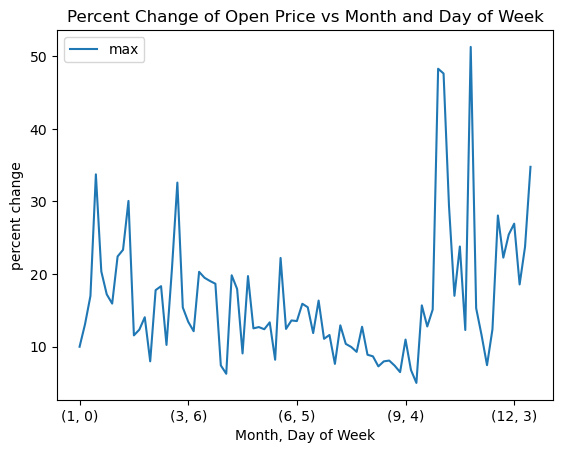

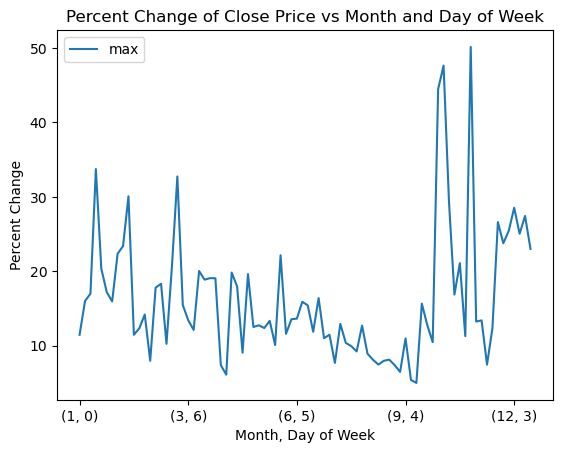

In [148]:
#The percent change of the open prices and close prices are grouped by month and day of week together and aggregated to generate a mean and median value then plotted
grouped_open = kline['change_open'].groupby([kline.index.month, kline.index.day_of_week]).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Open Price vs Month and Day of Week", xlabel = "Month, Day of Week", ylabel="percent change")

grouped_open = kline['change_close'].groupby([kline.index.month, kline.index.day_of_week]).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Close Price vs Month and Day of Week", xlabel = "Month, Day of Week", ylabel="Percent Change")

#The percent change of the open prices and close prices are grouped by month and day of week together and aggregated to generate a minimum or maximum value then plotted
grouped_open = kline['change_open'].groupby([kline.index.month, kline.index.day_of_week]).agg(["min"])
grouped_open.plot(title = "Percent Change of Open Price vs Month and Day of Week", xlabel = "Month, Day of Week", ylabel="percent change")

grouped_open = kline['change_close'].groupby([kline.index.month, kline.index.day_of_week]).agg(["min"])
grouped_open.plot(title = "Percent Change of Close Price vs Month and Day of Week", xlabel = "Month, Day of Week", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby([kline.index.month, kline.index.day_of_week]).agg(["max"])
grouped_open.plot(title = "Percent Change of Open Price vs Month and Day of Week", xlabel = "Month, Day of Week", ylabel="percent change")

grouped_open = kline['change_close'].groupby([kline.index.month, kline.index.day_of_week]).agg(["max"])
grouped_open.plot(title = "Percent Change of Close Price vs Month and Day of Week", xlabel = "Month, Day of Week", ylabel="Percent Change")

<Axes: title={'center': 'Percent Change of Close Price vs Hour of Day'}, xlabel='Hour of Day', ylabel='Percent Change'>

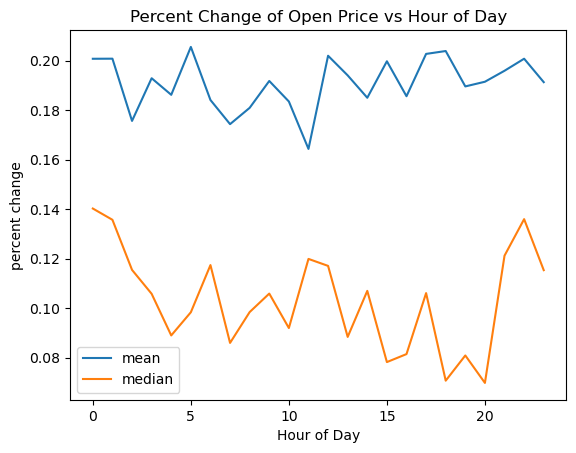

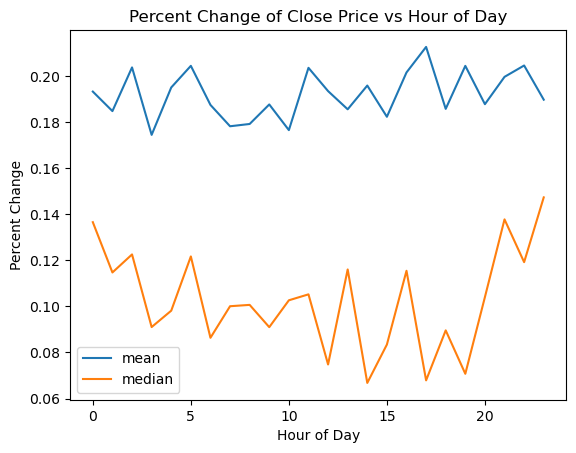

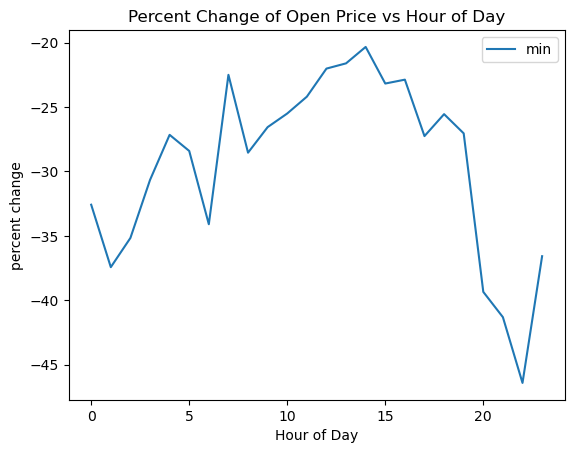

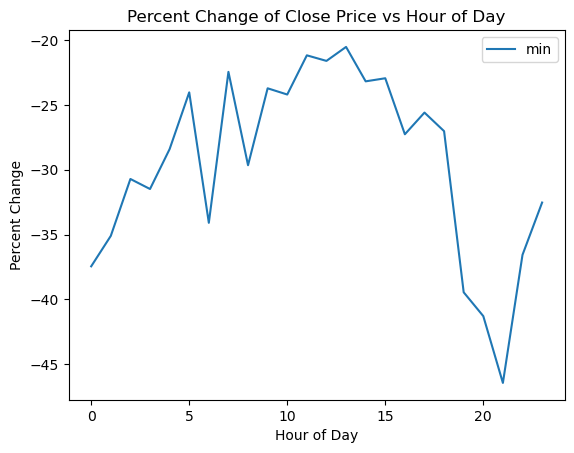

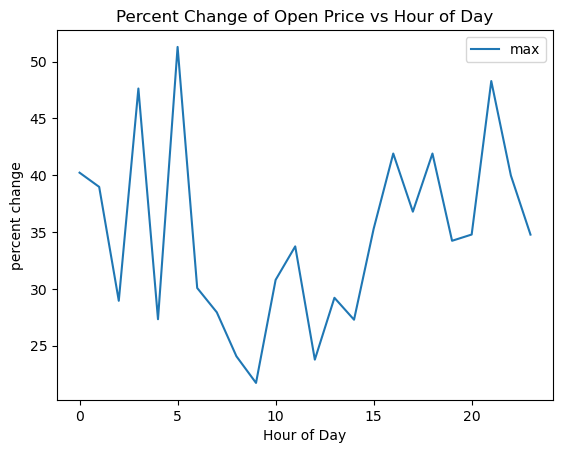

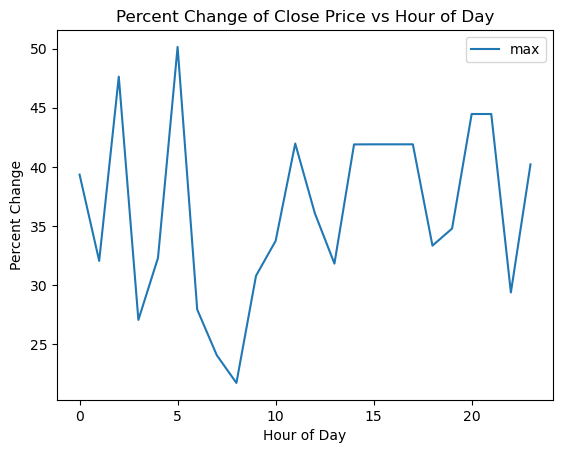

In [149]:
#The percent change of the open prices and close prices are grouped by the hour of the day and aggregated to generate a mean and median value then plotted
grouped_open = kline['change_open'].groupby(kline.index.hour).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Open Price vs Hour of Day", xlabel = "Hour of Day", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.hour).agg(["mean", "median"])
grouped_open.plot(title = "Percent Change of Close Price vs Hour of Day", xlabel = "Hour of Day", ylabel="Percent Change")
#The percent change of the open prices and close prices are grouped by the hour of the day and aggregated to generate a minimum or maximum value then plotted
grouped_open = kline['change_open'].groupby(kline.index.hour).agg(["min"])
grouped_open.plot(title = "Percent Change of Open Price vs Hour of Day", xlabel = "Hour of Day", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.hour).agg(["min"])
grouped_open.plot(title = "Percent Change of Close Price vs Hour of Day", xlabel = "Hour of Day", ylabel="Percent Change")

grouped_open = kline['change_open'].groupby(kline.index.hour).agg(["max"])
grouped_open.plot(title = "Percent Change of Open Price vs Hour of Day", xlabel = "Hour of Day", ylabel="percent change")

grouped_open = kline['change_close'].groupby(kline.index.hour).agg(["max"])
grouped_open.plot(title = "Percent Change of Close Price vs Hour of Day", xlabel = "Hour of Day", ylabel="Percent Change")

In [150]:
#This code segment is to fit the models
from prophet import Prophet
#The datasets have to include the time column as well as renaming the columns in order to be compatible with Prophet
close_df = kline['close']
close_df = close_df.reset_index()
close_df.columns = ["ds", "y"]

open_df = kline['open']
open_df = open_df.reset_index()
open_df.columns = ["ds", "y"]

#Two separate models are used for each column
open_mod = Prophet()
open_mod.fit(open_df)

close_mod = Prophet()
close_mod.fit(close_df)




17:44:58 - cmdstanpy - INFO - Chain [1] start processing
17:46:00 - cmdstanpy - INFO - Chain [1] done processing
17:46:05 - cmdstanpy - INFO - Chain [1] start processing
17:47:23 - cmdstanpy - INFO - Chain [1] done processing


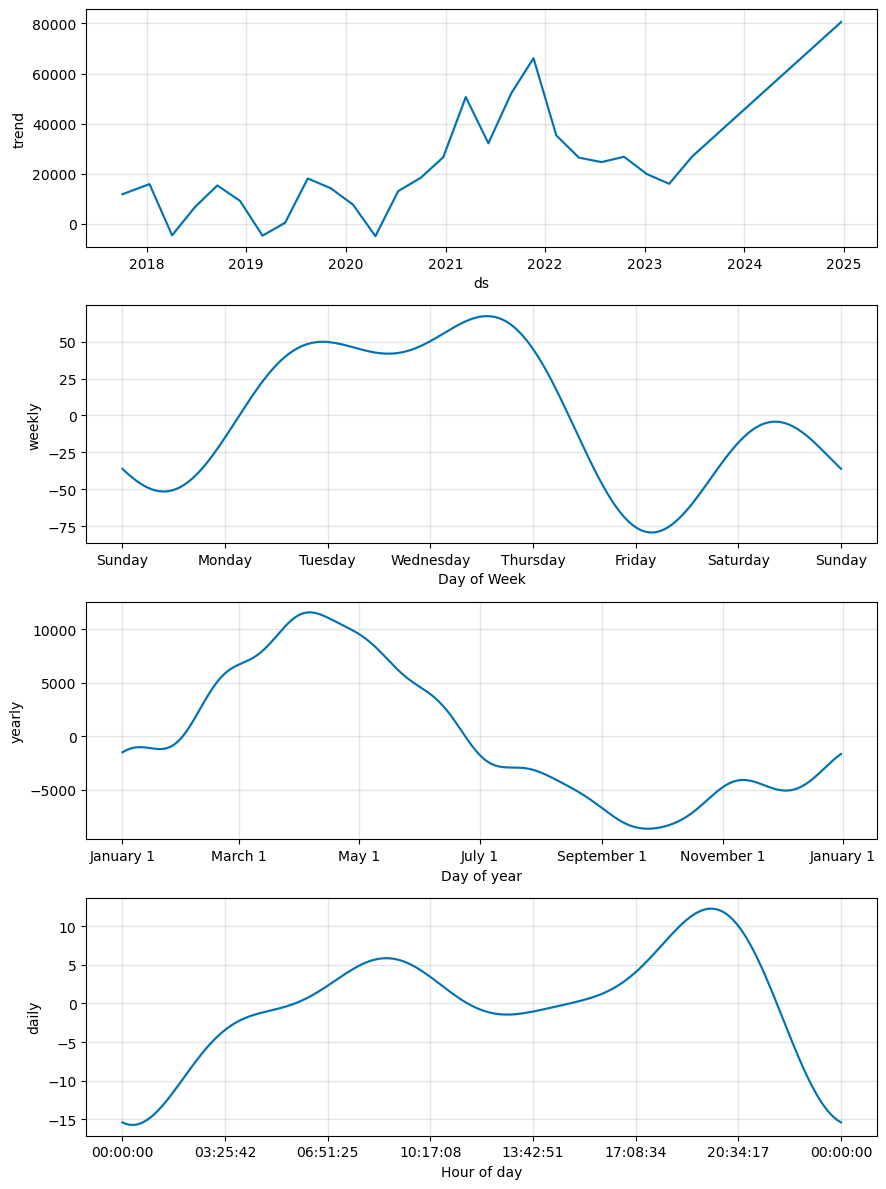

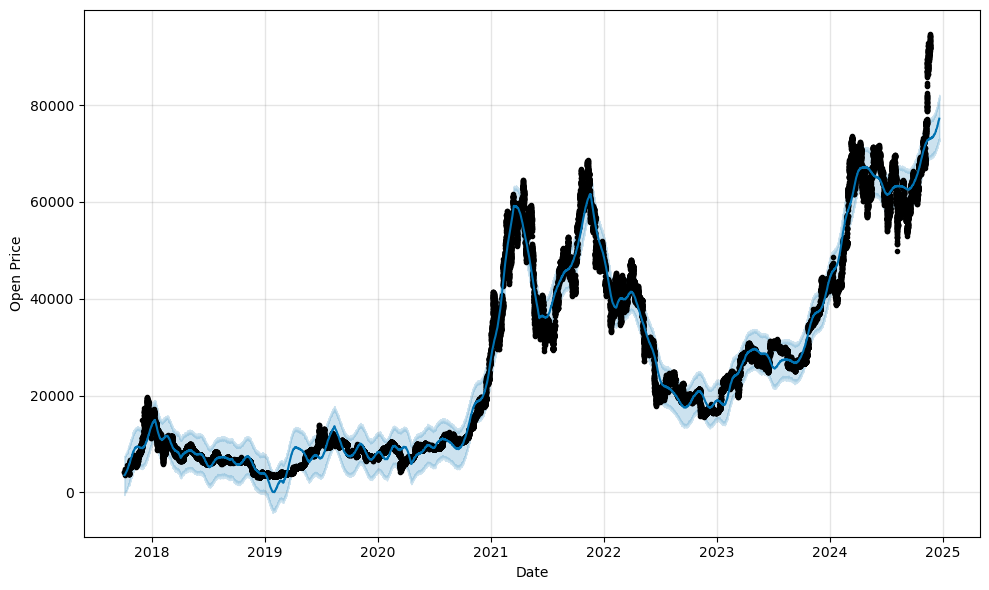

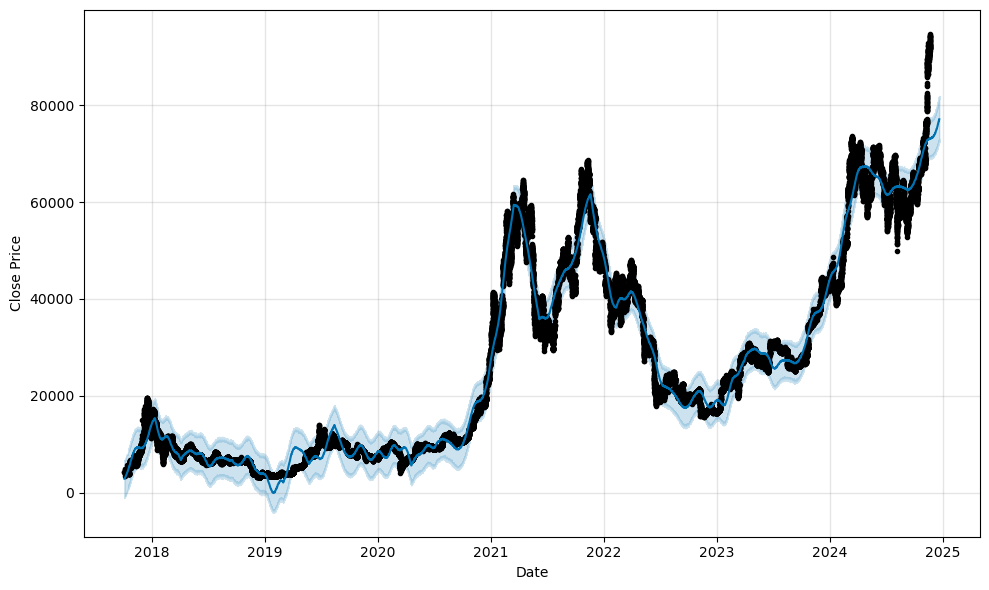

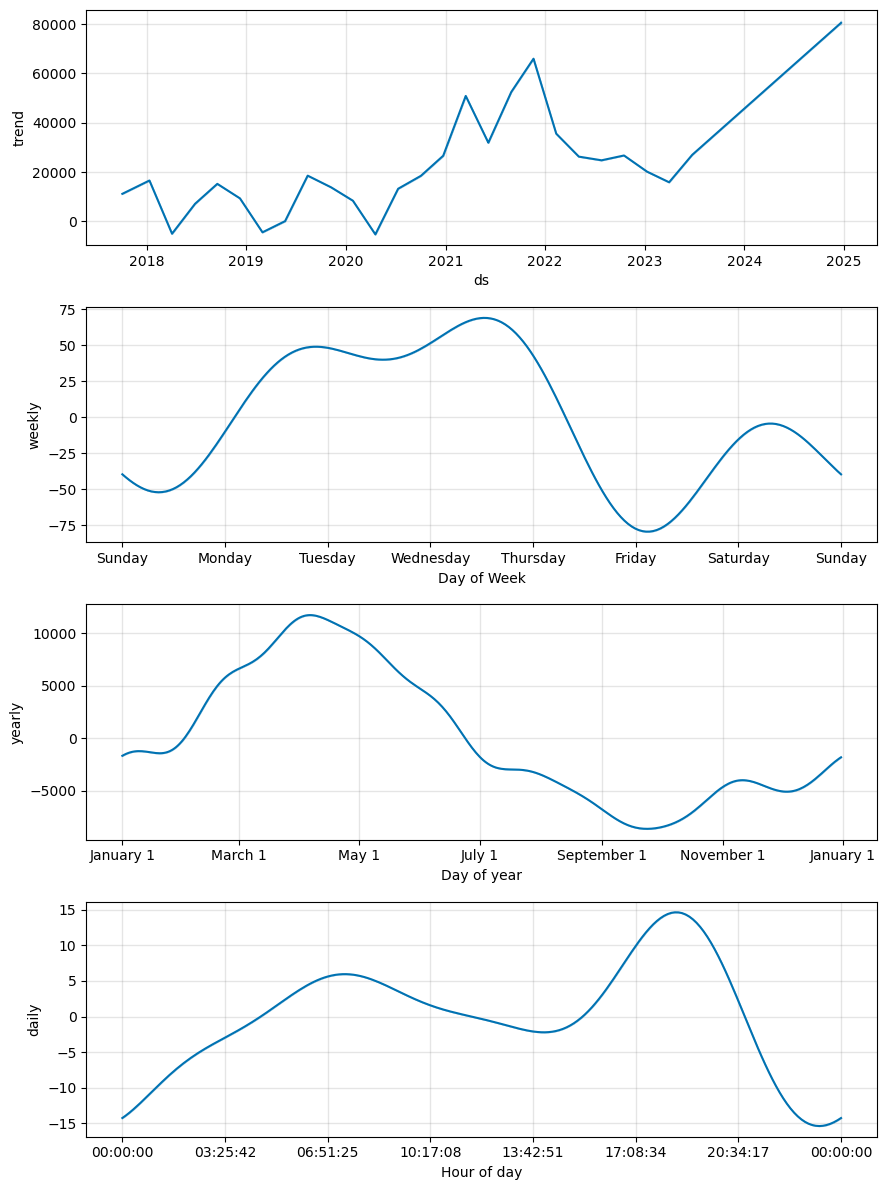

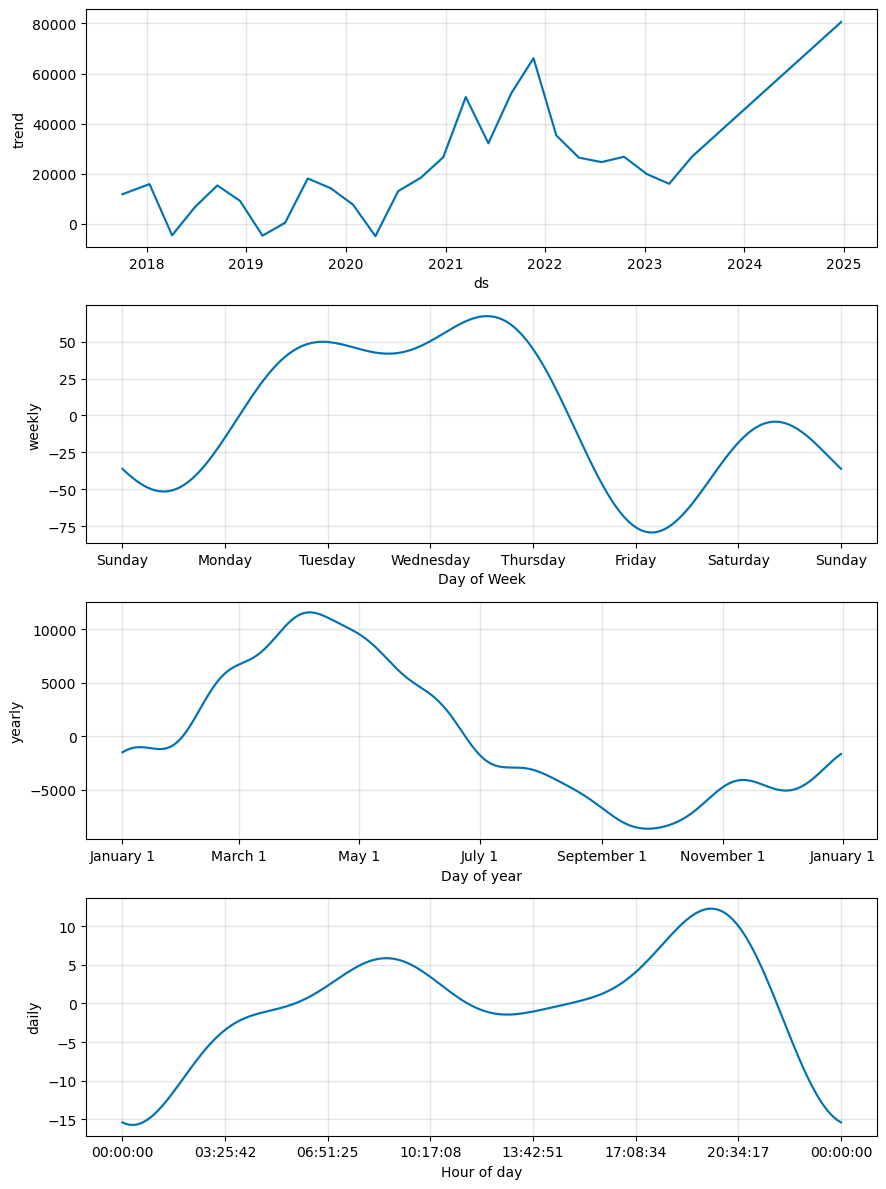

In [159]:
#In this segment the resultant fitted prophet models are graphed
future_dataspans_op = open_mod.make_future_dataframe(720, freq="h")
future_dataspans_op = open_mod.predict(future_dataspans_op)
future_dataspans_cl = close_mod.make_future_dataframe(720, freq="h")
future_dataspans_cl = close_mod.predict(future_dataspans_cl)
open_mod.plot(future_dataspans_op, xlabel="Date", ylabel="Open Price")
close_mod.plot(future_dataspans_cl, xlabel="Date", ylabel="Close Price")

close_mod.plot_components(future_dataspans_cl)
open_mod.plot_components(future_dataspans_op)

                     date  dollar_equivalent  dollars
62045 2024-11-20 08:00:00        1067.798983      0.0
62046 2024-11-20 09:00:00        1070.406831      0.0
62047 2024-11-20 10:00:00        1071.715846      0.0
62048 2024-11-20 11:00:00        1064.099346      0.0
62049 2024-11-20 12:00:00        1062.519929      0.0
62050 2024-11-20 13:00:00        1060.099891      0.0
62051 2024-11-20 14:00:00        1063.574382      0.0
62052 2024-11-20 15:00:00        1066.299894      0.0
62053 2024-11-20 16:00:00        1067.593070      0.0
62054 2024-11-20 17:00:00        1064.278105      0.0
$1949.9917355371902


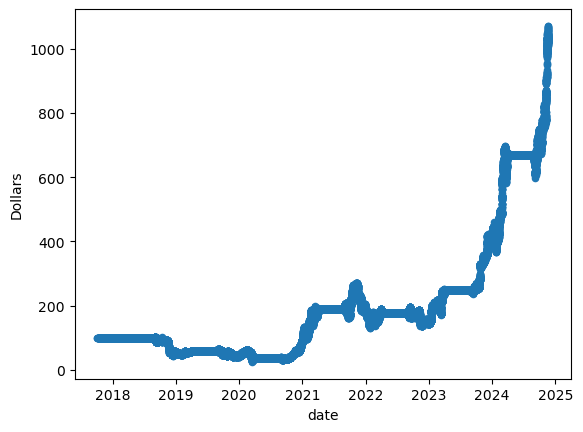

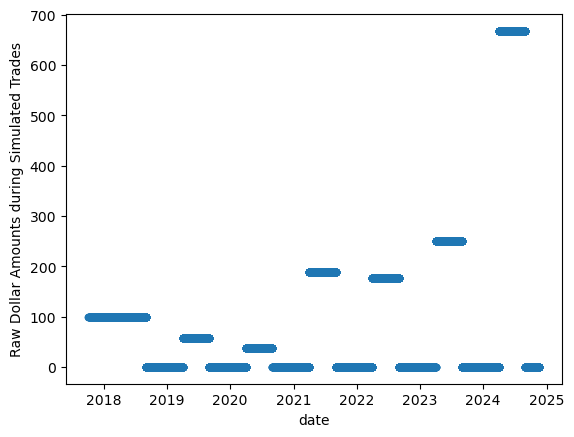

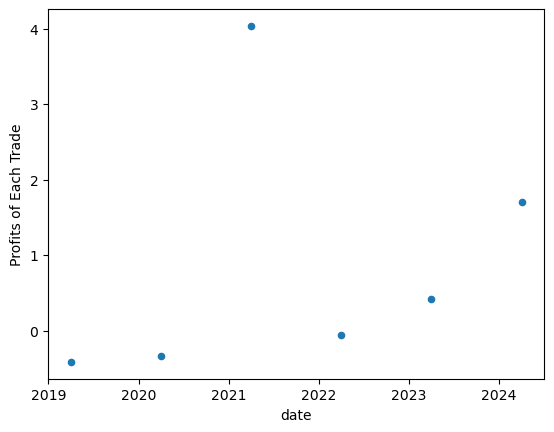

In [154]:
import pandas as pd

#This is to test the strategy using the earlier found months
dollars = 100
coins = 0
#Use 0.005 as a base cost for trading transaction
cost = 0.005
#Create a array to store the total dollar value at each step of the trading strategy evaluation
wallet = []
#Create a array to store the raw dollar amounts at each step of the trading strategy evaluation
raw_dollars = []
#Create an array to store the trading percent changes at each step of the trading strategy evaluation
trades = []
#Create an array to store the times associated with each trade 
time_trades = []
#Create a variable to store the last buy and the last sell of each trade
last_buy = 0
last_sell = 0
for i in range(len(kline['close'])):
    buy_time_check =  (kline.index[i].month == 9)
    sell_time_check =  (kline.index[i].month == 4)
    if dollars > 0:
        if buy_time_check:
            coins = dollars * (1-cost) / kline.iloc[i, 1]
            dollars = 0
            last_buy = kline.iloc[i, 1]
    elif coins > 0:
        if sell_time_check:
            dollars = coins * (1-cost) * kline.iloc[i, 1]
            coins = 0
            last_sell = kline.iloc[i, 1]
            time_trades.append(kline.index[i])
            trades.append((last_sell - last_buy) / last_buy)
            
            
            
    dollar_eq = float(dollars + coins * (1-cost) * kline.iloc[i, 1])
    wallet.append(dollar_eq)
    raw_dollars.append(dollars)

results = pd.DataFrame({"date":kline.index, "dollar_equivalent":wallet, "dollars":raw_dollars})
print(results.tail(10))
results.plot(x="date", y="dollar_equivalent", kind = "scatter", ylabel="Dollars")
results.plot(x="date", y="dollars", kind = "scatter", ylabel="Raw Dollar Amounts during Simulated Trades")
trades = pd.DataFrame({'date':time_trades, "profits":trades})
trades.plot(x="date", y="profits", kind = "scatter", ylabel="Profits of Each Trade")
    
# Perform a sanity check to see what would've been made if Bitcoin was bought near the beginning and sold near the end
sanity_k = kline.reset_index()
print(f"${(1 + (sanity_k.loc[sanity_k.shape[0] - 10, 'close'] - sanity_k.loc[10, 'close']) / sanity_k.loc[10, 'close']) * 100}")

                     date  dollar_equivalent   dollars
62045 2024-11-20 08:00:00           1.298686  1.298686
62046 2024-11-20 09:00:00           1.298686  1.298686
62047 2024-11-20 10:00:00           1.298686  1.298686
62048 2024-11-20 11:00:00           1.298686  1.298686
62049 2024-11-20 12:00:00           1.298686  1.298686
62050 2024-11-20 13:00:00           1.298686  1.298686
62051 2024-11-20 14:00:00           1.298686  1.298686
62052 2024-11-20 15:00:00           1.298686  1.298686
62053 2024-11-20 16:00:00           1.298686  1.298686
62054 2024-11-20 17:00:00           1.298686  1.298686


<Axes: xlabel='date', ylabel='Profits of Each Trade'>

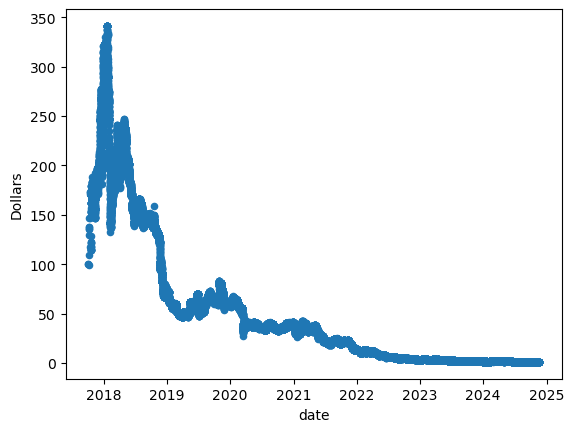

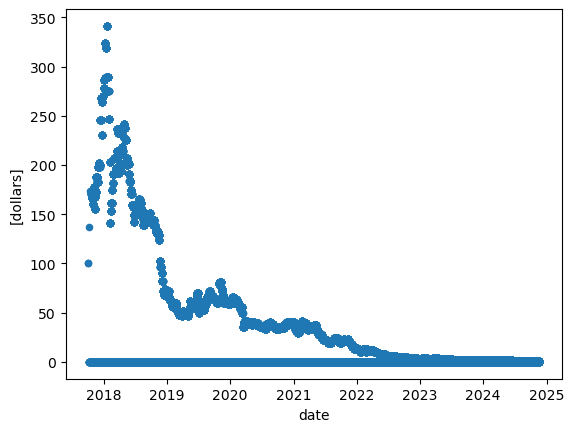

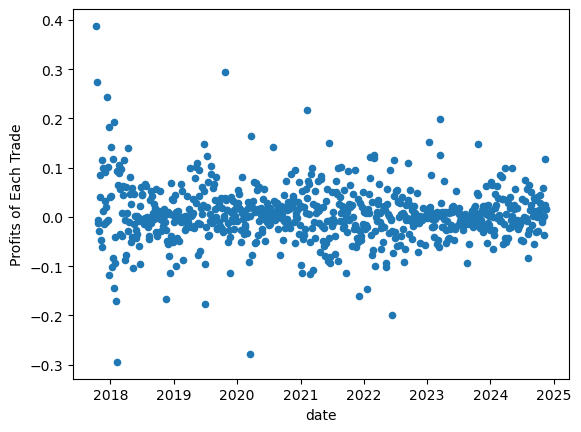

In [155]:
import pandas as pd

#This is to test the strategy using just day of week sales
dollars = 100
coins = 0
cost = 0.005
wallet = []
raw_dollars = []
trades = []
time_trades = []
last_buy = 0
last_sell = 0
for i in range(len(kline['close'])):
    buy_time_check =  (kline.index[i].day_of_week == 3) | (kline.index[i].day_of_week == 6)
    sell_time_check =  (kline.index[i].day_of_week == 5) | (kline.index[i].day_of_week == 1)
    if dollars > 0:
        if buy_time_check:
            coins = dollars * (1-cost) / kline.iloc[i, 1]
            dollars = 0
            last_buy = kline.iloc[i, 1]
    elif coins > 0:
        if sell_time_check:
            dollars = coins * (1-cost) * kline.iloc[i, 1]
            coins = 0
            last_sell = kline.iloc[i, 1]
            time_trades.append(kline.index[i])
            trades.append((last_sell - last_buy) / last_buy)
            
            
    dollar_eq = float(dollars + coins * (1-cost) * kline.iloc[i, 1])
    wallet.append(dollar_eq)
    raw_dollars.append(dollars)

results = pd.DataFrame({"date":kline.index, "dollar_equivalent":wallet, "dollars":raw_dollars})
print(results.tail(10))
results.plot(x="date", y=["dollar_equivalent"], kind = "scatter", ylabel = "Dollars")
results.plot(x="date", y=["dollars"], kind = "scatter")
trades = pd.DataFrame({'date':time_trades, "profits":trades})
trades.plot(x="date", y="profits", kind = "scatter", ylabel="Profits of Each Trade")
    
    

                     date  dollar_equivalent       dollars
62045 2024-11-20 08:00:00       2.073554e-09  2.073554e-09
62046 2024-11-20 09:00:00       2.073554e-09  2.073554e-09
62047 2024-11-20 10:00:00       2.073554e-09  2.073554e-09
62048 2024-11-20 11:00:00       2.073554e-09  2.073554e-09
62049 2024-11-20 12:00:00       2.073554e-09  2.073554e-09
62050 2024-11-20 13:00:00       2.073554e-09  2.073554e-09
62051 2024-11-20 14:00:00       2.073554e-09  2.073554e-09
62052 2024-11-20 15:00:00       2.073554e-09  2.073554e-09
62053 2024-11-20 16:00:00       2.073554e-09  2.073554e-09
62054 2024-11-20 17:00:00       2.073554e-09  2.073554e-09


<Axes: xlabel='date', ylabel='Profits of Each Trade'>

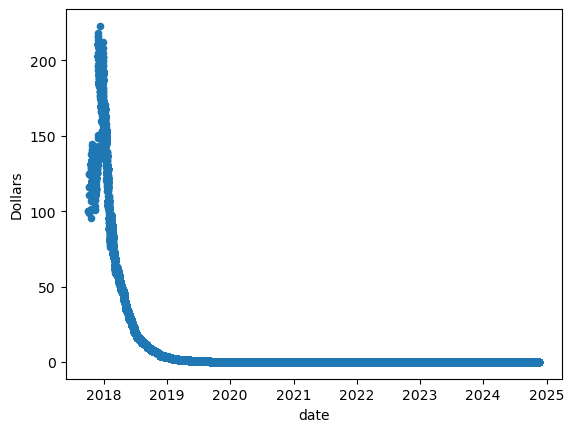

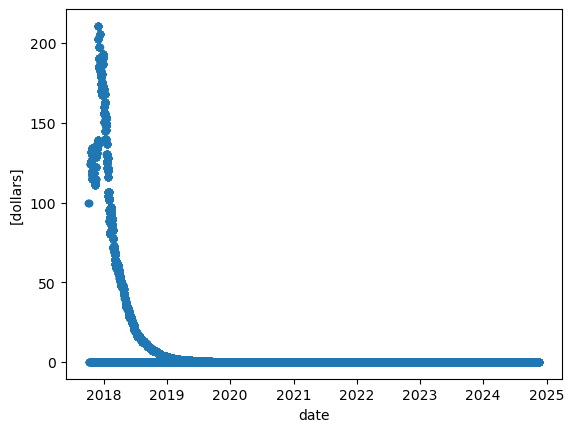

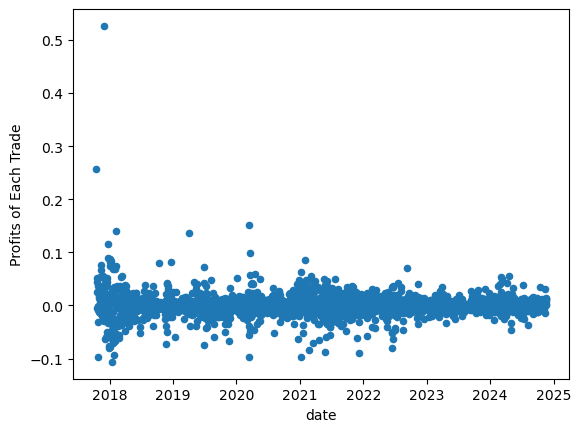

In [157]:
import pandas as pd

#This is to test the strategy using just hourly
dollars = 100
coins = 0
cost = 0.005
wallet = []
raw_dollars = []
trades = []
time_trades = []
last_buy = 0
last_sell = 0
for i in range(len(kline['close'])):
    buy_time_check =  (kline.index[i].hour == 22)
    sell_time_check =  (kline.index[i].hour == 5)
    if dollars > 0:
        if buy_time_check:
            coins = dollars * (1-cost) / kline.iloc[i, 1]
            dollars = 0
            last_buy = kline.iloc[i, 1]
    elif coins > 0:
        if sell_time_check:
            dollars = coins * (1-cost) * kline.iloc[i, 1]
            coins = 0
            last_sell = kline.iloc[i, 1]
            time_trades.append(kline.index[i])
            trades.append((last_sell - last_buy) / last_buy)
            
            
    dollar_eq = float(dollars + coins * (1-cost) * kline.iloc[i, 1])
    wallet.append(dollar_eq)
    raw_dollars.append(dollars)

results = pd.DataFrame({"date":kline.index, "dollar_equivalent":wallet, "dollars":raw_dollars})
print(results.tail(10))
results.plot(x="date", y=["dollar_equivalent"], kind = "scatter", ylabel = "Dollars")
results.plot(x="date", y=["dollars"], kind = "scatter")
trades = pd.DataFrame({'date':time_trades, "profits":trades})
trades.plot(x="date", y="profits", kind = "scatter", ylabel="Profits of Each Trade")
    
    

                     date  dollar_equivalent   dollars
62045 2024-11-20 08:00:00           2.758053  2.758053
62046 2024-11-20 09:00:00           2.758053  2.758053
62047 2024-11-20 10:00:00           2.758053  2.758053
62048 2024-11-20 11:00:00           2.758053  2.758053
62049 2024-11-20 12:00:00           2.758053  2.758053
62050 2024-11-20 13:00:00           2.758053  2.758053
62051 2024-11-20 14:00:00           2.758053  2.758053
62052 2024-11-20 15:00:00           2.758053  2.758053
62053 2024-11-20 16:00:00           2.758053  2.758053
62054 2024-11-20 17:00:00           2.758053  2.758053


<Axes: xlabel='date', ylabel='Profits of Each Trade'>

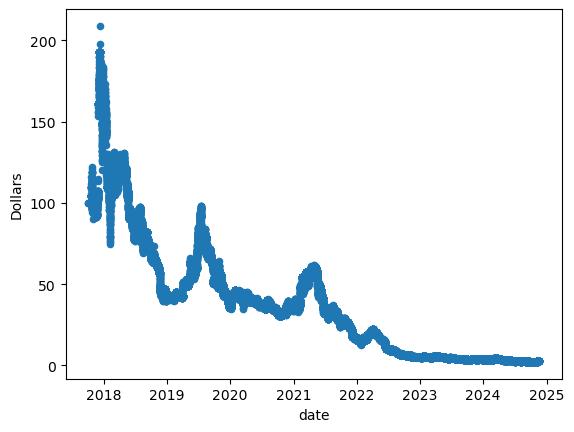

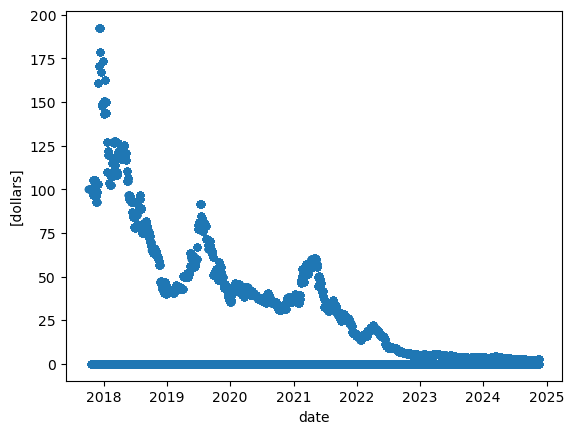

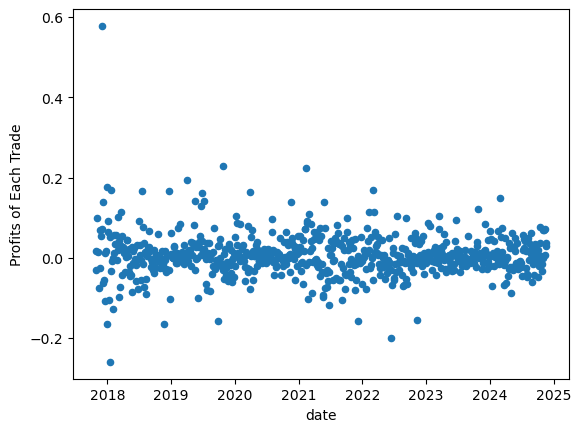

In [158]:
import pandas as pd

#This is to test the strategy using hourly and day of the week
dollars = 100
coins = 0
cost = 0.005
wallet = []
raw_dollars = []
trades = []
time_trades = []
last_buy = 0
last_sell = 0
for i in range(len(kline['close'])):
    buy_time_check =  (kline.index[i].hour == 22) * ((kline.index[i].day_of_week == 3) | (kline.index[i].day_of_week == 6))
    sell_time_check =  (kline.index[i].hour == 5) * ((kline.index[i].day_of_week == 5) | (kline.index[i].day_of_week == 2))
    if dollars > 0:
        if buy_time_check:
            coins = dollars * (1-cost) / kline.iloc[i, 1]
            dollars = 0
            last_buy = kline.iloc[i, 1]
    elif coins > 0:
        if sell_time_check:
            dollars = coins * (1-cost) * kline.iloc[i, 1]
            coins = 0
            last_sell = kline.iloc[i, 1]
            time_trades.append(kline.index[i])
            trades.append((last_sell - last_buy) / last_buy)
            
            
    dollar_eq = float(dollars + coins * (1-cost) * kline.iloc[i, 1])
    wallet.append(dollar_eq)
    raw_dollars.append(dollars)

results = pd.DataFrame({"date":kline.index, "dollar_equivalent":wallet, "dollars":raw_dollars})
print(results.tail(10))
results.plot(x="date", y=["dollar_equivalent"], kind = "scatter", ylabel = "Dollars")
results.plot(x="date", y=["dollars"], kind = "scatter")
trades = pd.DataFrame({'date':time_trades, "profits":trades})
trades.plot(x="date", y="profits", kind = "scatter", ylabel="Profits of Each Trade")
    
    

                     date  dollar_equivalent  dollars
62045 2024-11-20 08:00:00        1209.072267      0.0
62046 2024-11-20 09:00:00        1212.025142      0.0
62047 2024-11-20 10:00:00        1213.507344      0.0
62048 2024-11-20 11:00:00        1204.883156      0.0
62049 2024-11-20 12:00:00        1203.094777      0.0
62050 2024-11-20 13:00:00        1200.354560      0.0
62051 2024-11-20 14:00:00        1204.288738      0.0
62052 2024-11-20 15:00:00        1207.374845      0.0
62053 2024-11-20 16:00:00        1208.839112      0.0
62054 2024-11-20 17:00:00        1205.085566      0.0


<Axes: xlabel='date', ylabel='Profits of Each Trade'>

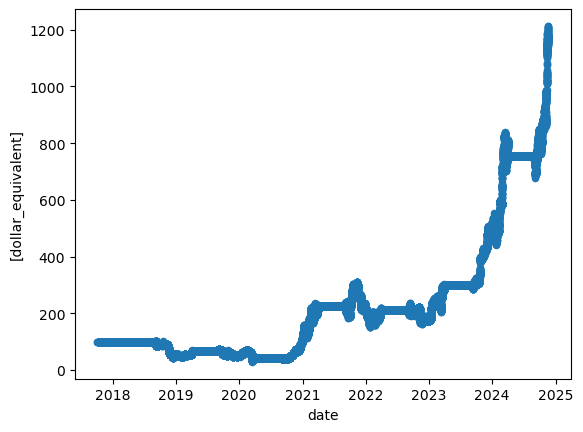

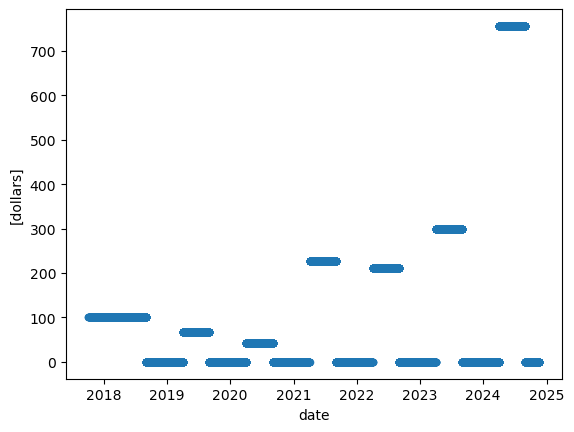

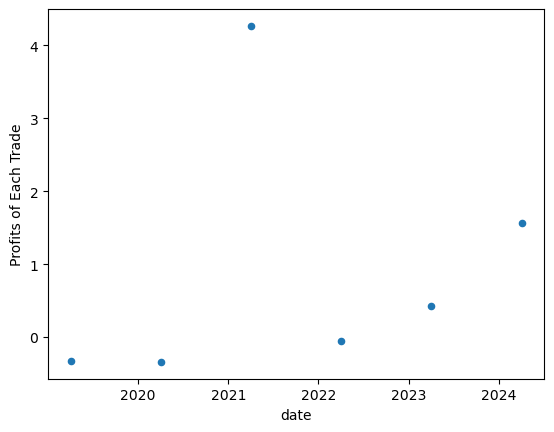

In [156]:
import pandas as pd

#This is to test the strategy in which both day of week and month are taken into account
dollars = 100
coins = 0
#Use 0.005 as a base cost for trading transaction
cost = 0.005
wallet = []
raw_dollars = []
trades = []
time_trades = []
last_buy = 0
last_sell = 0
for i in range(len(kline['close'])):
    buy_time_check = ((kline.index[i].day_of_week == 3) | (kline.index[i].day_of_week == 6)) * (kline.index[i].month == 9)
    sell_time_check = ((kline.index[i].day_of_week == 5) | (kline.index[i].day_of_week == 2)) * (kline.index[i].month == 4)
    if dollars > 0:
        if buy_time_check:
            coins = dollars * (1-cost) / kline.iloc[i, 1]
            dollars = 0
            last_buy = kline.iloc[i, 1]
    elif coins > 0:
        if sell_time_check:
            dollars = coins * (1-cost) * kline.iloc[i, 1]
            coins = 0
            last_sell = kline.iloc[i, 1]
            time_trades.append(kline.index[i])
            trades.append((last_sell - last_buy) / last_buy)
            
            
    dollar_eq = float(dollars + coins * (1-cost) * kline.iloc[i, 1])
    wallet.append(dollar_eq)
    raw_dollars.append(dollars)

results = pd.DataFrame({"date":kline.index, "dollar_equivalent":wallet, "dollars":raw_dollars})
print(results.tail(10))
results.plot(x="date", y=["dollar_equivalent"], kind = "scatter")
results.plot(x="date", y=["dollars"], kind = "scatter")
trades = pd.DataFrame({'date':time_trades, "profits":trades})
trades.plot(x="date", y="profits", kind = "scatter", ylabel="Profits of Each Trade")
    